<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
#!pip install -U scikit-learn
%pip install tqdm
%pip install pandas
%pip install seaborn
%pip install numpy
%pip uninstall scikit-learn
%pip install scikit-learn


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('loan.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.shape

(480, 13)

In [10]:
data['Loan_Status'] = data['Loan_Status'].replace({'T': 1, 'F': 0})

In [11]:
data['Dependents'] = data['Dependents'].replace({'3+': 3})

# 2. Objectives


In [12]:
data=data.drop(['Loan_ID'],axis=1)
data=data.drop(['Gender'],axis=1)
data=data.drop(['Property_Area'],axis=1)
data.head(5)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y


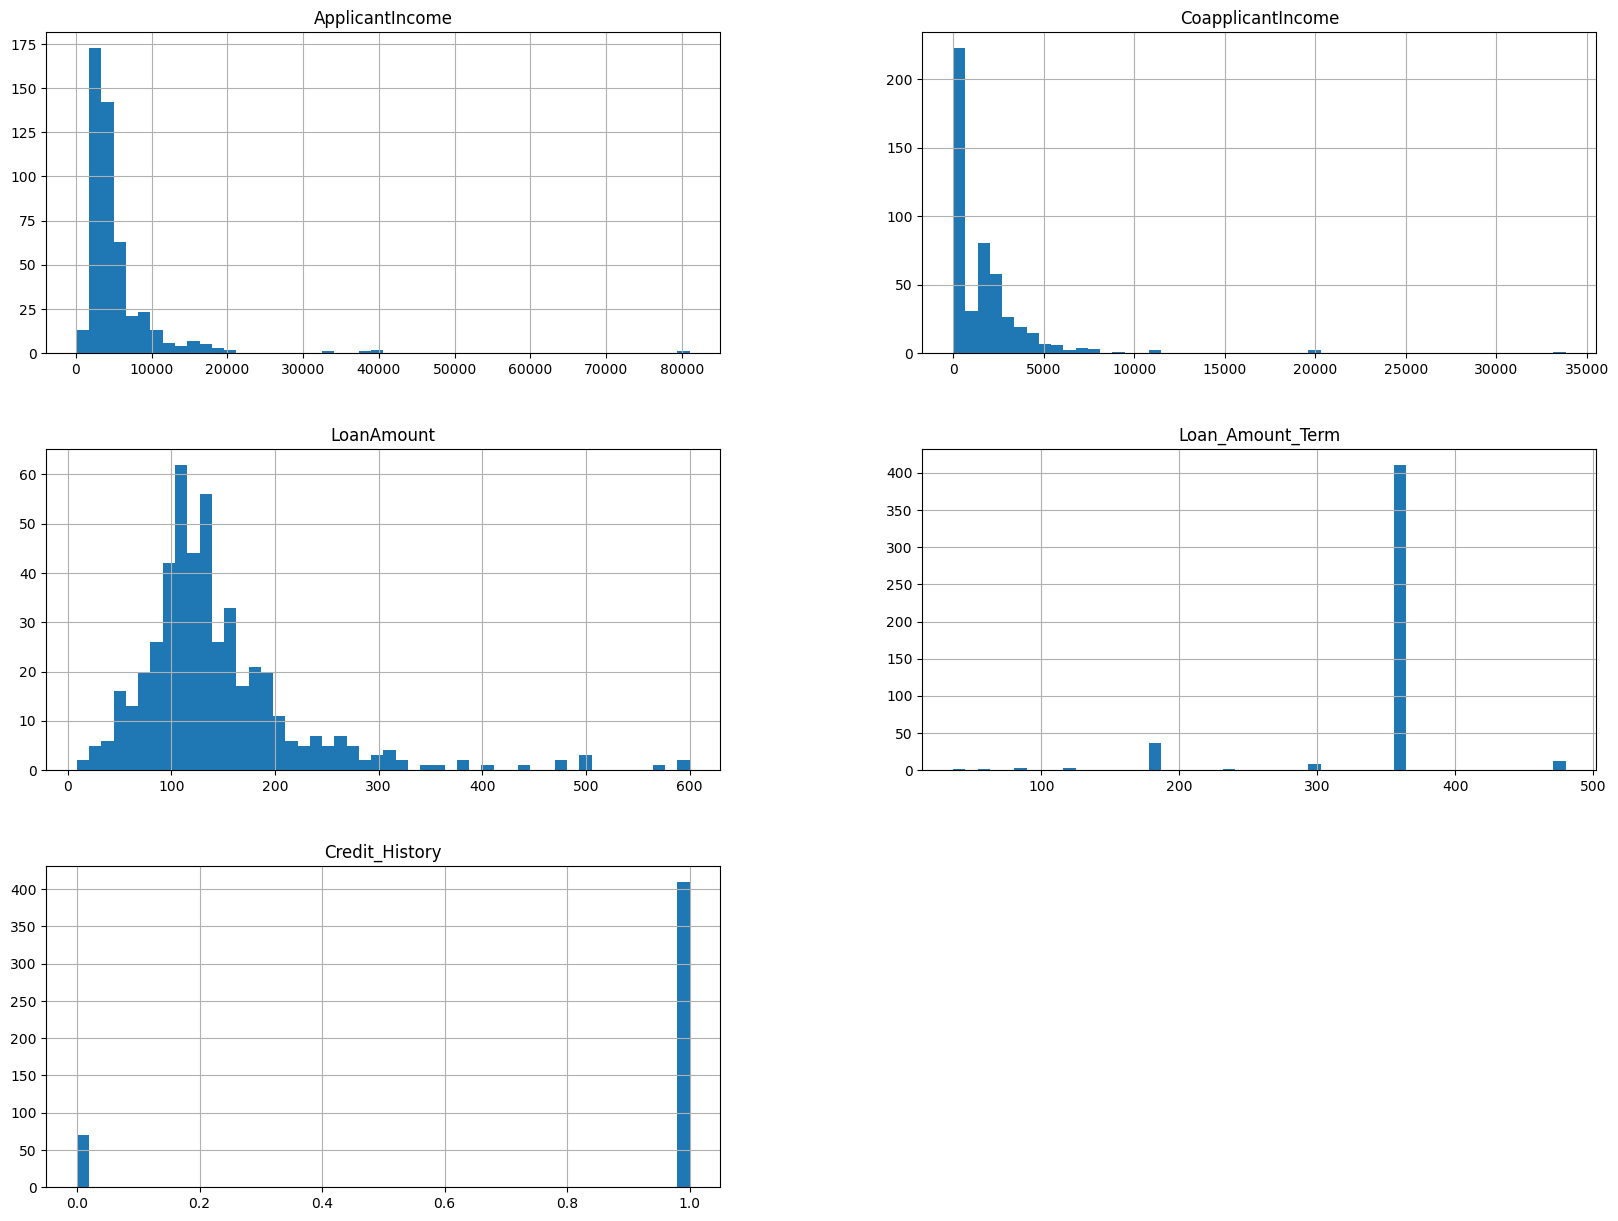

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'Loan_Status' column
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

# Calculate correlation matrix
corr_matrix = data.corr()

# Sort the correlation values for 'Loan_Status'
loan_status_corr = corr_matrix['Loan_Status'].sort_values(ascending=False)

print(loan_status_corr)


<ipython-input-14-f9289e442b43>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Loan_Status          1.000000
Credit_History       0.529390
Loan_Amount_Term    -0.007798
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
LoanAmount          -0.071753
Name: Loan_Status, dtype: float64


In [15]:
data.nunique()

Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Loan_Status            2
dtype: int64

In [16]:
data.columns = data.columns.str.strip()

data = data.drop(['LoanAmount', 'CoapplicantIncome'], axis=1)

print(data.head())


  Married Dependents     Education Self_Employed  ApplicantIncome  \
1     Yes          1      Graduate            No             4583   
2     Yes          0      Graduate           Yes             3000   
3     Yes          0  Not Graduate            No             2583   
4      No          0      Graduate            No             6000   
5     Yes          2      Graduate           Yes             5417   

   Loan_Amount_Term  Credit_History  Loan_Status  
1             360.0             1.0            0  
2             360.0             1.0            1  
3             360.0             1.0            1  
4             360.0             1.0            1  
5             360.0             1.0            1  


In [17]:
data.Dependents.value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

<ipython-input-18-6bf4089318ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Loan_Status  )


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

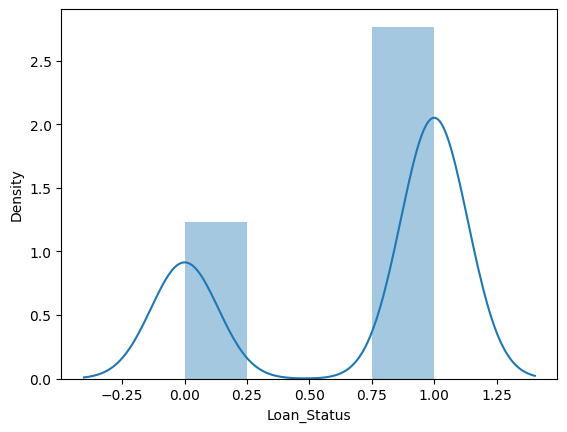

In [18]:
sns.distplot(data.Loan_Status  )

<ipython-input-19-84f032353bd3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='plasma',annot=True)


<AxesSubplot:>

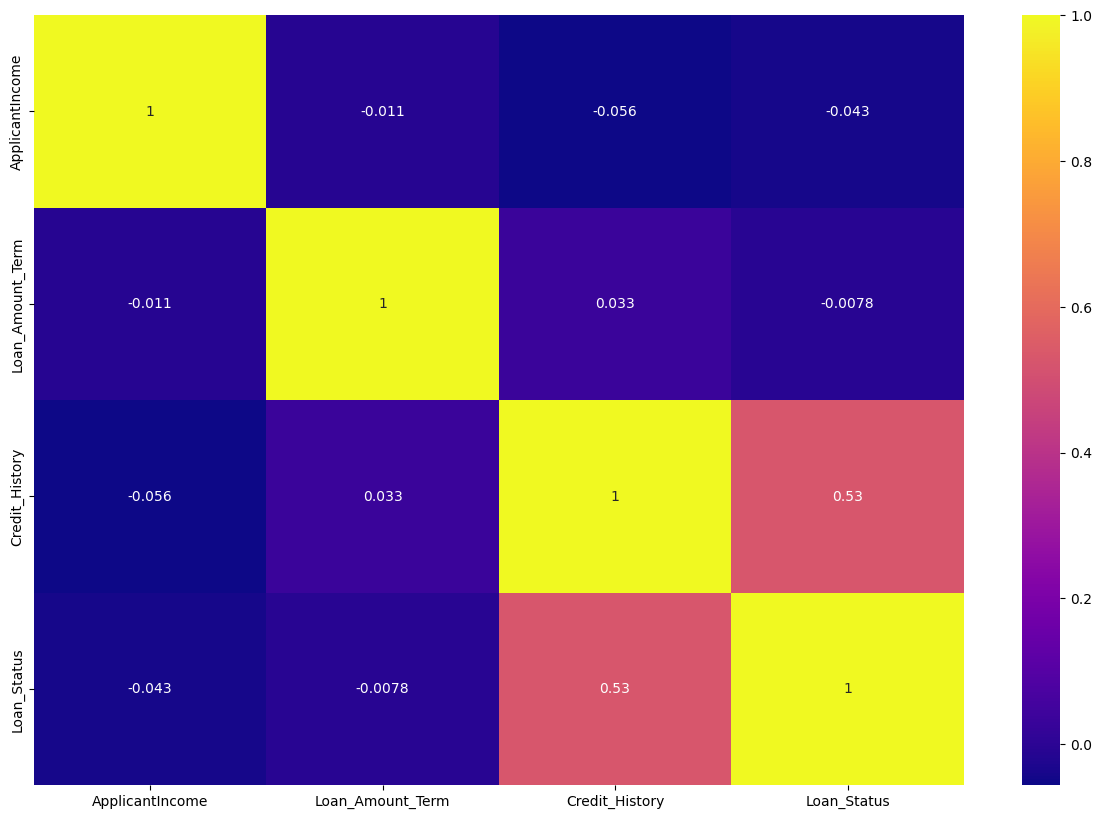

In [19]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True) 

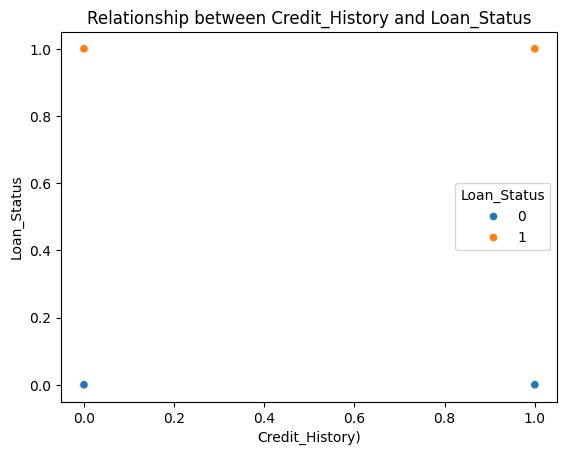

In [20]:
sns.scatterplot(x='Credit_History', y='Loan_Status', data=data, hue='Loan_Status')
plt.xlabel('Credit_History)')
plt.ylabel('Loan_Status')
plt.title('Relationship between Credit_History and Loan_Status')
plt.show()

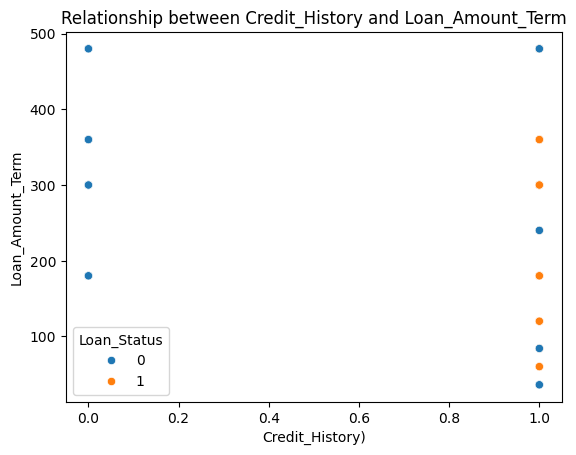

In [21]:
sns.scatterplot(x='Credit_History', y='Loan_Amount_Term', data=data, hue='Loan_Status')
plt.xlabel('Credit_History)')
plt.ylabel('Loan_Amount_Term')
plt.title('Relationship between Credit_History and Loan_Amount_Term')
plt.show()

<ipython-input-22-4f707d78a3e0>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t)


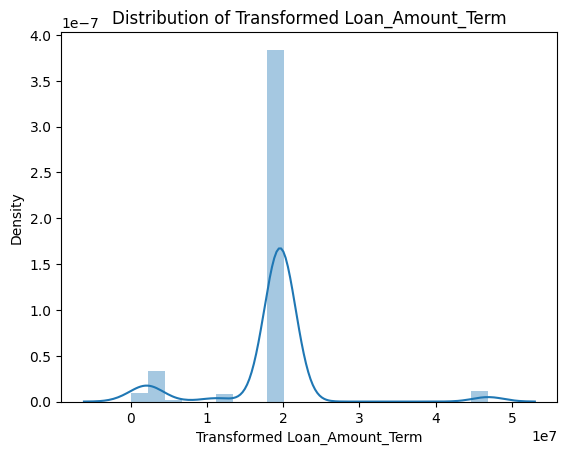

In [22]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data_X = data.drop(columns=['Loan_Status'])  # Extracting features (excluding 'Loan_Status')
data_Y = data[['Loan_Status']]  # Target variable

# Initialize and fit PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_X[['Loan_Amount_Term']])  # Fit on 'Loan_Amount_Term' variable

# Transform 'Loan_Amount_Term' using the fitted transformer
t = pt.transform(data_X[['Loan_Amount_Term']])

# Plot the distribution of transformed 'Loan_Amount_Term'
sns.distplot(t)
plt.title('Distribution of Transformed Loan_Amount_Term')
plt.xlabel('Transformed Loan_Amount_Term')
plt.ylabel('Density')
plt.show()


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Credit_History'>

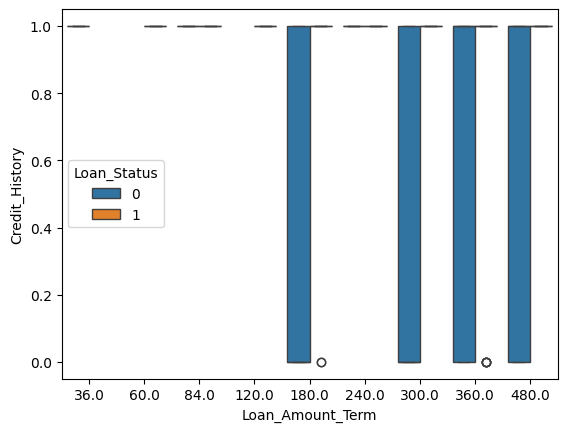

In [23]:
sns.boxplot(x='Loan_Amount_Term',y='Credit_History',hue='Loan_Status',data=data)

In [24]:
data_X.shape,data_Y.shape

((480, 7), (480, 1))

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Married           480 non-null    object 
 1   Dependents        480 non-null    object 
 2   Education         480 non-null    object 
 3   Self_Employed     480 non-null    object 
 4   ApplicantIncome   480 non-null    int64  
 5   Loan_Amount_Term  480 non-null    float64
 6   Credit_History    480 non-null    float64
 7   Loan_Status       480 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 24.4+ KB


# 3. Linear Regression Models


In [26]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.3, stratify=data_Y, random_state=0)


In [27]:
combined_data = pd.concat([train_X, test_X], axis=0)

combined_data_encoded = pd.get_dummies(combined_data)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data_encoded)

train_x = scaled_data[:len(train_X)]
test_x = scaled_data[len(train_X):]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, precision_score, recall_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_x, train_Y)

/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [30]:
test_X_encoded = pd.get_dummies(test_X)
y_pred_logi = log_reg.predict(test_X_encoded)


/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [31]:
y_pred_logi = log_reg.predict(test_x)

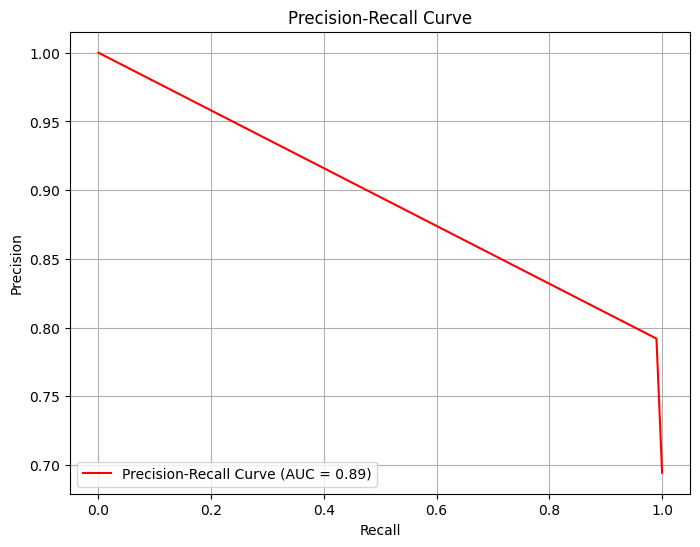

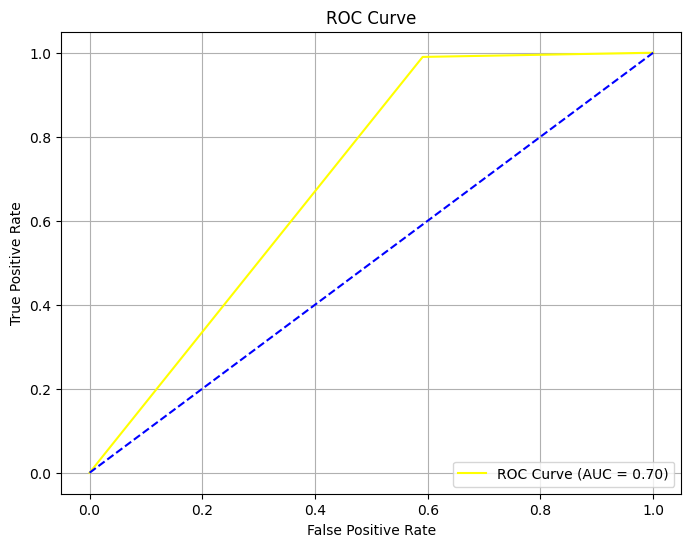

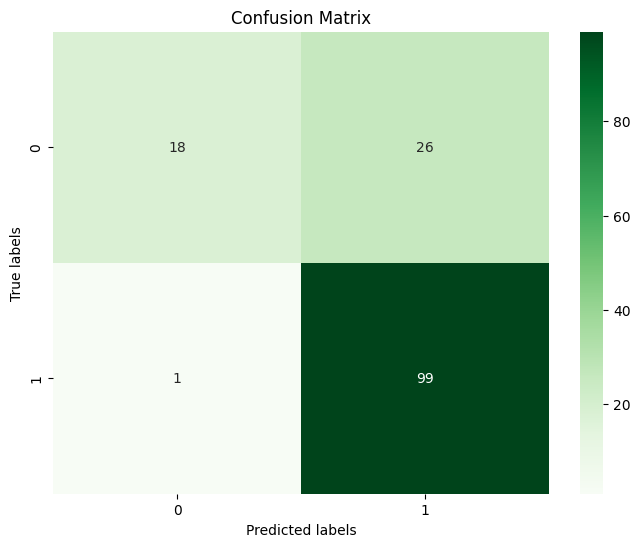

Precision: 0.79
Recall: 0.99
Accuracy: 0.81


In [32]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision, recall, _ = precision_recall_curve(test_Y, y_pred_logi)

fpr, tpr, _ = roc_curve(test_Y, y_pred_logi)

pr_auc = auc(recall, precision)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision_logi = precision_score(test_Y, y_pred_logi).round(2)
recall_logi = recall_score(test_Y, y_pred_logi).round(2)
accuracy_logi = accuracy_score(test_Y, y_pred_logi).round(2)

conf_matrix = confusion_matrix(test_Y, y_pred_logi)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print('Precision:', precision_logi)
print('Recall:', recall_logi)
print('Accuracy:', accuracy_logi)

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_Y)

DecisionTreeClassifier()

In [34]:
y_pred_decision_tree = decision_tree.predict(test_x)

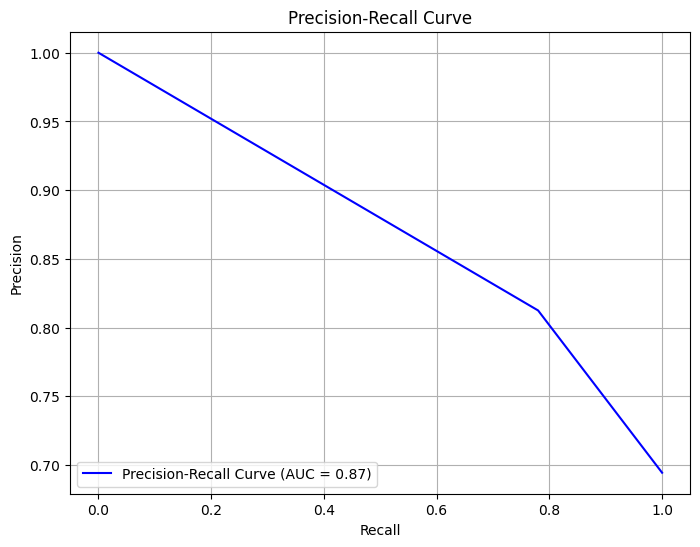

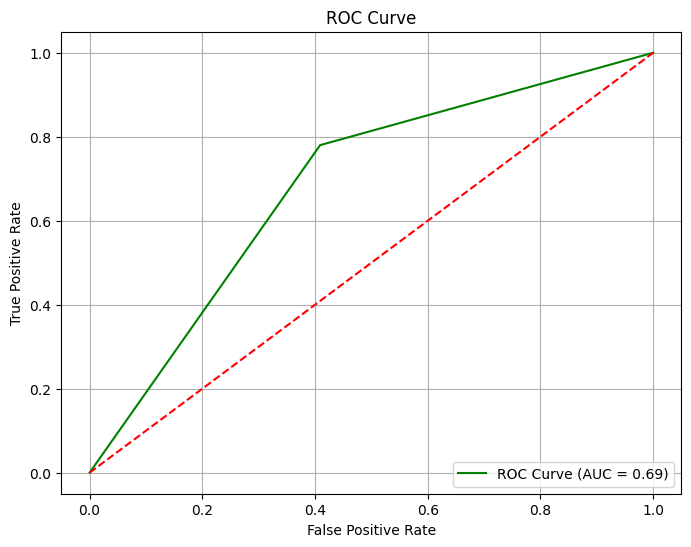

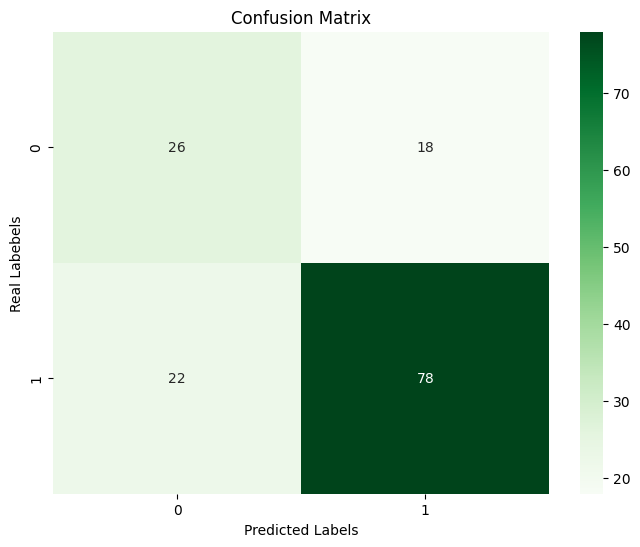

Precision: 0.81
Recall: 0.78
Accuracy: 0.72


In [35]:
precision, recall, _ = precision_recall_curve(test_Y, y_pred_decision_tree)

fpr, tpr, _ = roc_curve(test_Y, y_pred_decision_tree)

pr_auc = auc(recall, precision)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision_decision_tree = precision_score(test_Y, y_pred_decision_tree).round(2)
recall_decision_tree = recall_score(test_Y, y_pred_decision_tree).round(2)
accuracy_decision_tree = accuracy_score(test_Y, y_pred_decision_tree).round(2)

conf_matrix = confusion_matrix(test_Y, y_pred_decision_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labebels')
plt.title('Confusion Matrix')
plt.show()

print('Precision:', precision_decision_tree)
print('Recall:', recall_decision_tree)
print('Accuracy:', accuracy_decision_tree)



In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_Y)
y_pred_random_forest = random_forest.predict(test_x)

/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


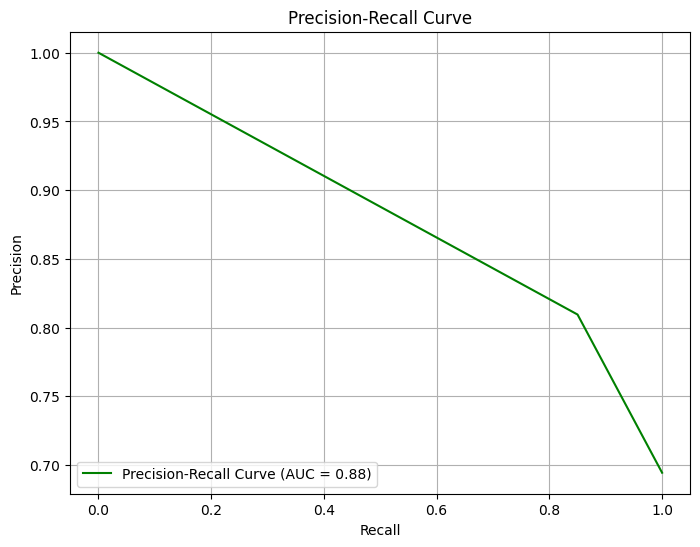

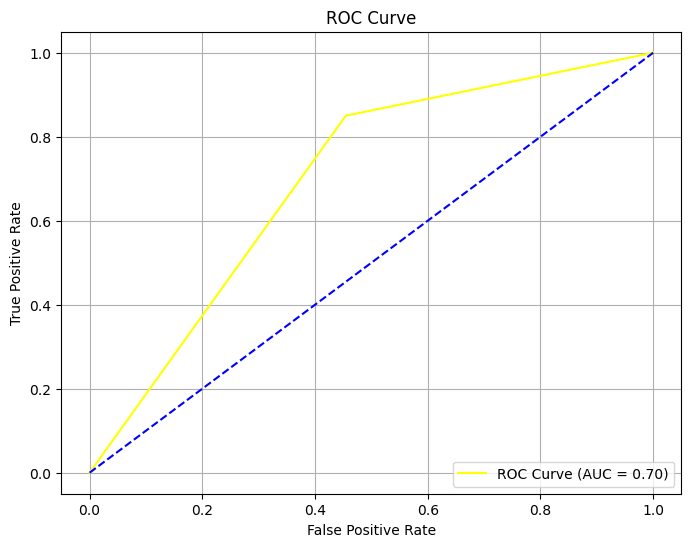

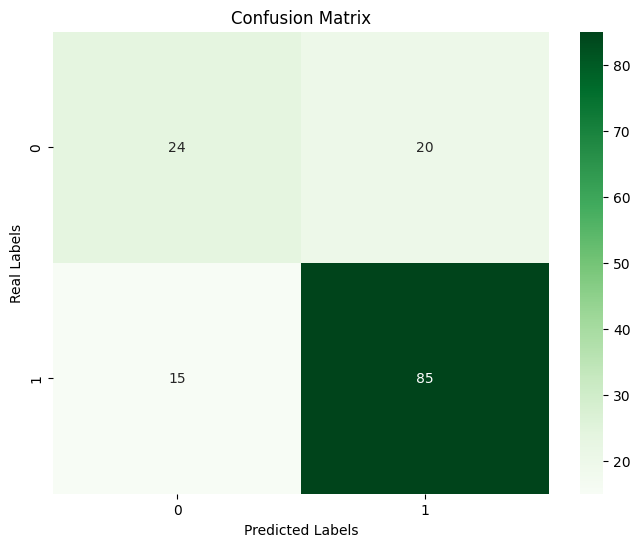

Precision: 0.81
Recall: 0.85
Accuracy: 0.76


In [37]:
precision, recall, _ = precision_recall_curve(test_Y, y_pred_random_forest)

fpr, tpr, _ = roc_curve(test_Y, y_pred_random_forest)

pr_auc = auc(recall, precision)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision_random_forest = precision_score(test_Y, y_pred_random_forest).round(2)
recall_random_forest = recall_score(test_Y, y_pred_random_forest).round(2)
accuracy_random_forest = accuracy_score(test_Y, y_pred_random_forest).round(2)

conf_matrix = confusion_matrix(test_Y, y_pred_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
plt.title('Confusion Matrix')
plt.show()

print('Precision:', precision_random_forest)
print('Recall:', recall_random_forest)
print('Accuracy:', accuracy_random_forest)



# 4. Insights and key findings


In [38]:
print('Accuracy of Logistic Regression:', accuracy_logi)
print('Accuracy of Decision Tree:', accuracy_decision_tree)
print('Accuracy of Random Forest:', accuracy_random_forest)

Accuracy of Logistic Regression: 0.81
Accuracy of Decision Tree: 0.72
Accuracy of Random Forest: 0.76


The logistic regression model achieved the highest accuracy (0.81), outperforming both the decision tree and random forest models (both with an accuracy of 0.74). This suggests that, for this dataset and task, logistic regression may be the most suitable choice. However, it's essential to consider other factors like model interpretability and computational efficiency before making a final decision.

# 5. Next Steps


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
